In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\User\logis.csv")
print(df)

      Id  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0      0       3    0  34.5      0      0    7.8292         2
1      1       3    1  47.0      1      0    7.0000         1
2      2       2    0  62.0      0      0    9.6875         2
3      3       3    0  27.0      0      0    8.6625         1
4      4       3    1  22.0      1      1   12.2875         1
..   ...     ...  ...   ...    ...    ...       ...       ...
413  413       3    0   NaN      0      0    8.0500         1
414  414       1    1  39.0      0      0  108.9000         0
415  415       3    0  38.5      0      0    7.2500         1
416  416       3    0   NaN      0      0    8.0500         1
417  417       3    0   NaN      1      1   22.3583         0

[418 rows x 8 columns]


In [3]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")

X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [4]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [5]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

In [6]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [7]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [8]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (7, 891)
Shape of Y_train :  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test :  (1, 418)


In [9]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [10]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [15]:
iterations = 10000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  1000 iteration is :  0.5927579935366782
cost after  2000 iteration is :  0.573030982081626
cost after  3000 iteration is :  0.5576948105193713
cost after  4000 iteration is :  0.5447498968660922
cost after  5000 iteration is :  0.5336250606165371
cost after  6000 iteration is :  0.5240085169850338
cost after  7000 iteration is :  0.5156661353237495
cost after  8000 iteration is :  0.5084068367367647
cost after  9000 iteration is :  0.5020717094371209


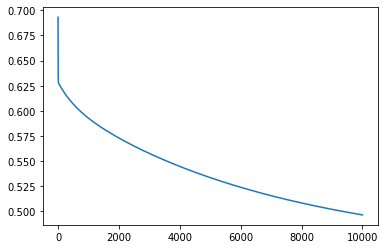

In [16]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [17]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [18]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  80.62 %


C:\Users\User\anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
